In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [24]:
data = pd.read_csv('credit2.csv')
data.head()

,Name,Debt,Income,Married?,Owns_Property,Gender,Risk
0,Tim,0,0,0,0,0,0
1,Joe,2,2,1,1,0,0
2,Sue,0,2,1,0,1,0
3,John,1,0,0,0,0,2
4,Mary,2,0,1,0,1,2


In [25]:
from sklearn import preprocessing

data['Debt'] = data['Debt'].astype('category')
data['Income'] = data['Income'].astype('category')
data['Married?'] = data['Married?'].astype('category')
data['Owns_Property'] = data['Owns_Property'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Risk'] = data['Risk'].astype('category')
data.dtypes

data["Income"] = data['Income'].cat.codes
data["Married?"] = data['Married?'].cat.codes
data["Owns_Property"] = data['Owns_Property'].cat.codes
data["Gender"] = data['Gender'].cat.codes
data["Debt"] = data['Debt'].cat.codes

data["Risk"] = data['Risk'].cat.codes

In [26]:
data

,Name,Debt,Income,Married?,Owns_Property,Gender,Risk
0,Tim,0,0,0,0,0,0
1,Joe,2,2,1,1,0,0
2,Sue,0,2,1,0,1,0
3,John,1,0,0,0,0,2
4,Mary,2,0,1,0,1,2
5,Fred,0,0,1,0,0,2
6,Pete,0,1,0,1,0,0
7,Jacob,2,1,1,1,0,0
8,Sofia,1,0,0,0,1,2


In [27]:
data = data.drop('Name', axis=1)

In [28]:
data

,Debt,Income,Married?,Owns_Property,Gender,Risk
0,0,0,0,0,0,0
1,2,2,1,1,0,0
2,0,2,1,0,1,0
3,1,0,0,0,0,2
4,2,0,1,0,1,2
5,0,0,1,0,0,2
6,0,1,0,1,0,0
7,2,1,1,1,0,0
8,1,0,0,0,1,2


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('Risk',axis=1)
y = data['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier

# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
dt_clf.fit(X, y)
dt_predictions = dt_clf.predict(X)

In [31]:
print("Accuracy Score")
print(accuracy_score(y, dt_predictions))

Accuracy Score
1.0


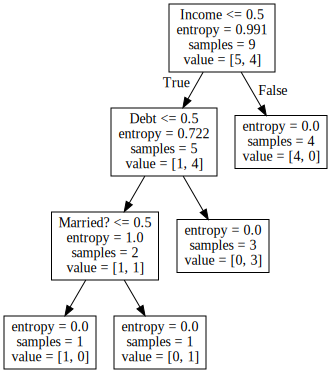

In [32]:
from sklearn import tree
dot_data = tree.export_graphviz(dt_clf, feature_names = X.columns)
graph = graphviz.Source(dot_data)
graph

In [53]:
from sklearn.tree import export_text
t = tree.export_text(dt_clf)
print(t)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 2
|   |--- feature_0 >  0.50
|   |   |--- class: 2
|--- feature_1 >  0.50
|   |--- class: 0

